In [43]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [44]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [45]:
if os.path.isfile("20200810_NSW_Healthservices.csv"):
    filepath = "20200810_NSW_Healthservices.csv"
    print("loading from file")
else:
    filepath = "https://ws-spsl-ext-non-auth.webapp.health.nsw.gov.au/rted/api/GetHospitalsReport"
    print("loading from the internet")

health_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [46]:
health_data.iloc[:,:]

,Name,Address,Suburb,Postcode,Phone,Email Address,Fax,LHD,Hospital Website,ED
0,Albury Wodonga Health,201 Borella Road,Albury,2640,02 6058 4444,NaN,NaN,Albury Wodonga Health,NaN,No emergency department
1,Armidale Rural Referral Hospital,Rusden Street,Armidale,2350,02 6776 9500,NaN,02 6776 4774,Hunter New England Local Health District,NaN,Reporting wait times
2,Auburn Hospital & Community Health Services,Hargrave Road,Auburn,2144,02 8759 3000,NaN,02 9563 9666,Western Sydney Local Health District,NaN,Reporting wait times
3,Ballina District Hospital,Cherry Street,Ballina,2478,02 6686 2111,NaN,02 6686 6731,Northern NSW Local Health District,NaN,Not reporting wait times
4,Balmain Hospital,29 Booth Street,Balmain,2041,02 9395 2111,NaN,02 9395 2020,Sydney Local Health District,NaN,No emergency department
...,...,...,...,...,...,...,...,...,...,...
261,Woy Woy Public Hospital,Ocean Beach Road,Woy Woy,2256,02 4344 8444,NaN,02 4344 8555,Central Coast Local Health District,NaN,No emergency department
262,Wyalong Hospital,70 Ungarie Road,West Wyalong,2671,02 6979 0000,NaN,02 6979 0006,Murrumbidgee Local Health District,NaN,Not reporting wait times
263,Wyong Public Hospital,Pacific Highway,Kanwal,2259,02 4394 8000,NaN,02 4393 8333,Central Coast Local Health District,NaN,Reporting wait times
264,Yass District Hospital,Meehan Street,Yass,2582,(02) 6220 2000,NaN,02 6226 2944,Southern NSW Local Health District,NaN,Not reporting wait times


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

We can also get the list of columns out of the data frame

In [47]:
health_data.columns

Index(['Name', 'Address', 'Suburb', 'Postcode', 'Phone', 'Email Address',
       'Fax', 'LHD', 'Hospital Website', 'ED'],
      dtype='object')

In [48]:
row_one = health_data.iloc[1]
row_one

Name                        Armidale Rural Referral Hospital
Address                                        Rusden Street
Suburb                                              Armidale
Postcode                                                2350
Phone                                           02 6776 9500
Email Address                                            NaN
Fax                                             02 6776 4774
LHD                 Hunter New England Local Health District
Hospital Website                                         NaN
ED                                      Reporting wait times
Name: 1, dtype: object

You can't index a row directly, you need to use the iloc property.

This gives us the row as a _Series_.

↓

In [49]:
row_three= health_data.iloc[3]
row_three

Name                         Ballina District Hospital
Address                                  Cherry Street
Suburb                                         Ballina
Postcode                                          2478
Phone                                     02 6686 2111
Email Address                                      NaN
Fax                                       02 6686 6731
LHD                 Northern NSW Local Health District
Hospital Website                                   NaN
ED                            Not reporting wait times
Name: 3, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [82]:
health_data['Suburb']

0            Albury
1          Armidale
2            Auburn
3           Ballina
4           Balmain
           ...     
261         Woy Woy
262    West Wyalong
263          Kanwal
264            Yass
265           Young
Name: Suburb, Length: 266, dtype: object

In [83]:
health_data['Suburb'].value_counts()

Gloucester             3
Randwick               3
Albury                 3
Lake Cargelligo        2
Wilcannia              2
                      ..
Molong                 1
Barham                 1
Tocomwal               1
New Lambton Heights    1
Tamworth               1
Name: Suburb, Length: 199, dtype: int64

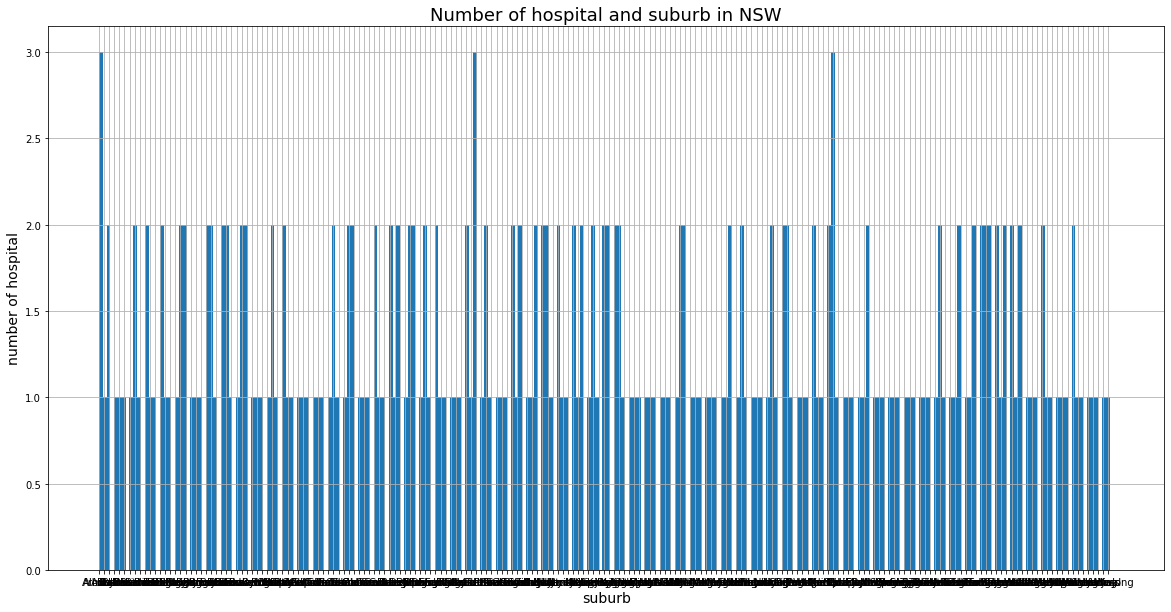

In [93]:
number_of_hospital = 266
lower_bound = 0
upper_bound = 199

plt.hist(health_data['Suburb'], bins=number_of_hospital, range=(lower_bound, upper_bound))
plt.title("Number of hospital and suburb in NSW", fontsize=18)
plt.xlabel('suburb', fontsize=14)
plt.ylabel('number of hospital', fontsize=14)
plt.grid(True)
plt.show()

In [92]:
health_data['LHD']
health_data['LHD'].value_counts()

Western NSW Local Health District                55
Hunter New England Local Health District         51
Murrumbidgee Local Health District               50
Northern NSW Local Health District               17
Southern NSW Local Health District               16
Illawarra Shoalhaven Local Health District       10
Northern Sydney Local Health District            10
South Eastern Sydney Local Health District        9
South Western Sydney Local Health District        9
Mid North Coast Local Health District             8
Nepean Blue Mountains Local Health District       7
Far West Local Health District                    5
Western Sydney Local Health District              5
Sydney Local Health District                      4
Central Coast Local Health District               4
St Vincent's Health Network                       3
Sydney Children's Hospitals Specialty Network     2
Albury Wodonga Health                             1
Name: LHD, dtype: int64

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

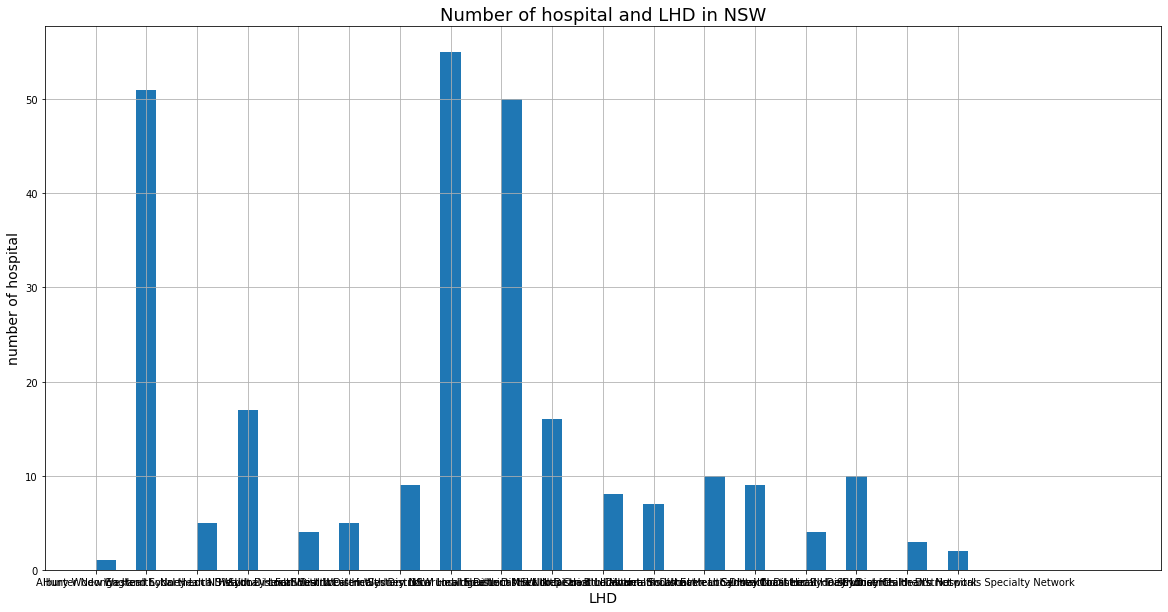

In [108]:
number=50
lower_bound = 0
upper_bound =20
plt.hist(health_data['LHD'], bins=number, range=(lower_bound, upper_bound))
plt.title("Number of hospital and LHD in NSW", fontsize=18)
plt.xlabel('LHD', fontsize=14)
plt.ylabel('number of hospital', fontsize=14)
plt.grid(True)
plt.show()

In [110]:
health_data['Name']

0                            Albury Wodonga Health
1                 Armidale Rural Referral Hospital
2      Auburn Hospital & Community Health Services
3                        Ballina District Hospital
4                                 Balmain Hospital
                          ...                     
261                        Woy Woy Public Hospital
262                               Wyalong Hospital
263                          Wyong Public Hospital
264                         Yass District Hospital
265                        Young District Hospital
Name: Name, Length: 266, dtype: object

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [112]:
health_data['ED'].value_counts()

Not reporting wait times    116
No emergency department      90
Reporting wait times         60
Name: ED, dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [113]:
health_data['ED']

0       No emergency department
1          Reporting wait times
2          Reporting wait times
3      Not reporting wait times
4       No emergency department
                 ...           
261     No emergency department
262    Not reporting wait times
263        Reporting wait times
264    Not reporting wait times
265    Not reporting wait times
Name: ED, Length: 266, dtype: object

In [131]:
health_data['Phone']
health_data['Phone'].value_counts()

02 6349 1700    2
02 6847 7200    2
08 8083 8777    2
02 6948 1319    2
02 6723 3266    2
               ..
02 6892 4003    1
02 6847 2366    1
02 6665 1203    1
02 6843 1909    1
02 4923 2000    1
Name: Phone, Length: 220, dtype: int64

In [138]:
health_data['Phone'].iloc[0:17]

0     02 6058 4444
1     02 6776 9500
2     02 8759 3000
3     02 6686 2111
4     02 9395 2111
5     03 5020 1606
6     02 9722 8000
7     02 6843 4100
8     02 6843 1909
9     03 5451 1000
10    02 6782 2500
11    02 6782 2507
12    02 4475 1500
13    02 6330 5311
14    02 6941 4333
15    02 6941 4333
16    02 6492 9111
Name: Phone, dtype: object

In [139]:
health_data.iloc[14:16]

,Name,Address,Suburb,Postcode,Phone,Email Address,Fax,LHD,Hospital Website,ED
14,Batlow/Adelong Multi Purpose Service,61-81 Pioneer Street,Batlow,2730,02 6941 4333,NaN,02 6941 4331,Murrumbidgee Local Health District,NaN,Not reporting wait times
15,Batlow/Adelong Residential Aged Care,61-81 Pioneer Street,Batlow,2730,02 6941 4333,NaN,02 6941 4331,Murrumbidgee Local Health District,NaN,No emergency department


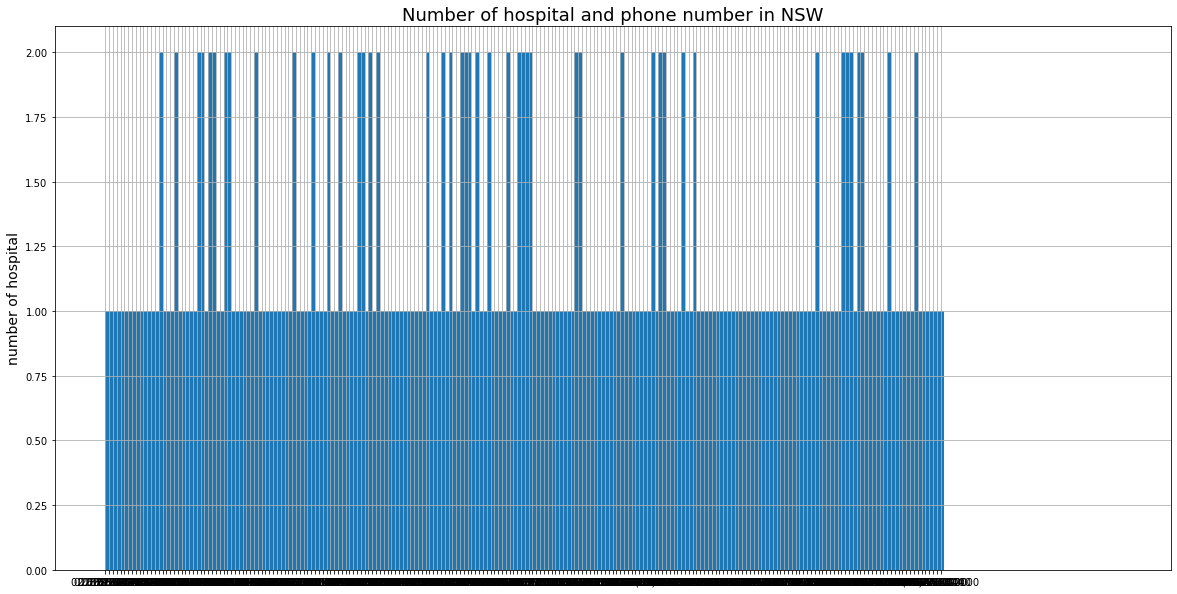

In [129]:
health_data['Phone'].value_counts()

number_x=266
lower_bound = 0
upper_bound =266
plt.hist(health_data['Phone'], bins=number_x, range=(lower_bound, upper_bound))
plt.title("Number of hospital and phone number in NSW", fontsize=18)
plt.ylabel('number of hospital', fontsize=14)
plt.grid(True)
plt.show()

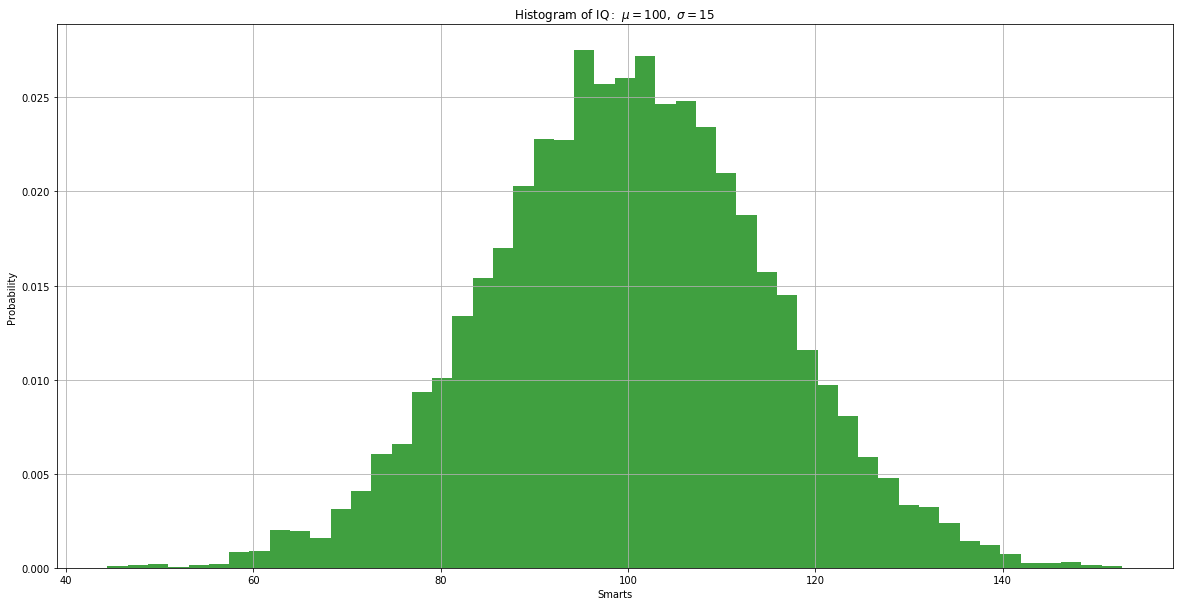

In [67]:
# the histogram of the data
plt.hist(x, 50, density=True, facecolor='green', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$') # allows for latex formatting
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()